## Tutorial: Simple Neural Network by Keras
### The Problem: MNIST digit classification
In this tutorial, we'll tackle a classic machine learning problem: MNIST handwritten digit classification: given an image, classify it as a digit.

<table class="image">
<tr><td><img src="./figures/mnist-examples.webp" alt="drawing" width="450"/></td></tr>
<caption align="center">Sample images from the MNIST dataset</caption>
</table>

MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels, and centered to reduce preprocessing and get started quicker.   
We’ll flatten each 28x28 into a 784 dimensional vector, which we’ll use as input to our neural network. Our output will be one of 10 possible classes: one for each digit.
### 1. Setup

In [1]:
# install used packages in the current Jupyter kernel
import sys
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install matplotlib

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

### 2. Preparing the Data
As mentioned earlier, we need to flatten each image before we can pass it into our neural network. We’ll also normalize the pixel values from [0, 255] to [-0.5, 0.5] to make our network easier to train (using smaller, centered values is often better).

In [2]:
def load_data(path):
    '''
    load mnist dataset from specified path
    '''
    with np.load(path) as f:
        X_train, y_train = f['x_train'], f['y_train']
        X_test, y_test = f['x_test'], f['y_test']
        return (X_train, y_train), (X_test, y_test)


(X_train, y_train), (X_test, y_test) = load_data('./data/mnist.npz')

# Normalize the images.
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

# Flatten the images.
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

print(X_train.shape) # (60000, 784)
print(X_test.shape)  # (10000, 784)
print(y_train.shape, y_test.shape)

(60000, 784)
(10000, 784)
(60000,) (10000,)


### 3. Building the Model
Every Keras model is either built using the `Sequential` class, which represents a linear stack of layers, or the functional `Model` class, which is more customizeable. We’ll be using the simpler Sequential model, since our network is indeed a linear stack of layers.

The `Sequential` constructor takes an array of Keras Layers. Since we’re just building a standard feedforward network, we only need the Dense layer, which is your regular fully-connected (dense) network layer.

Let’s throw in 3 `Dense` layers:

In [4]:
# Still a Work in process
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

The first two layers have 64 nodes each and use the `ReLU` activation function. The last layer is a `Softmax` output layer with 10 nodes, one for each class.  
The last thing we always need to do is **tell Keras what our network’s input will look like**. We can do that by specifying an `input_shape` to the first layer in the Sequential model:

In [5]:
# Build the model
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

Once the input shape is specified, Keras will automatically infer the shapes of inputs for later layers.  
### 4. Compiling the Model

#### Cross-Entropy
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.
<table class="image">
<tr><td><img src="./figures/cross_entropy.png" alt="drawing" width="400"/></td></tr>
</table>
The graph above shows the range of possible loss values given a true observation (label = 1). As the predicted probability approaches 1, log loss slowly decreases. As the predicted probability decreases, however, the log loss increases rapidly. Log loss penalizes both types of errors, but especially those predictions that are confident and wrong!

Before we can begin training, we need to configure the training process. We decide 3 key factors during the compilation step:
- The **optimizer**. We’ll stick with a pretty good default: the Adam gradient-based optimizer (Adam - A Method for Stochastic Optimization). Keras has many [other optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) you can look into as well.
- The **loss function**. Since we’re using a Softmax output layer, we’ll use the **Cross-Entropy** loss. Keras distinguishes between `binary_crossentropy` (2 classes) and `categorical_crossentropy` (>2 classes), so we’ll use the latter. [See all Keras losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses).
- A list of **metrics**. Since this is a classification problem, we’ll just have Keras report on the **accuracy** metric.



Here’s what that compilation looks like:

In [6]:
# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

### 5. Training the Model
Training a model in Keras literally consists only of calling `fit()` and specifying some parameters. There are a lot of possible parameters, but we’ll only manually supply a few:
- The **training data** (images and labels), commonly known as X and Y, respectively.
- The **number of epochs** (iterations over the entire dataset) to train for.
- The **batch size** (number of samples per gradient update) to use when training.

Keras expects the training targets to be 10-dimensional vectors, since there are 10 nodes in our Softmax output layer, but we’re instead supplying a single integer representing the class for each image. Conveniently, Keras provide the `to_categorical` method that fixes this exact issue. It turns our array of class integers into an array of <span style="color:orange">one-hot vectors</span> instead. For example, digit 2 would become `[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]`  

In [7]:
# Train the model.
history = model.fit(
  X_train, # training data
  keras.utils.to_categorical(y_train), # training targets in one-hot manner
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1875/1875 [==============================] - 2s 721us/step - loss: 0.5826 - accuracy: 0.8247
Epoch 2/5
1875/1875 [==============================] - 1s 685us/step - loss: 0.2012 - accuracy: 0.9390
Epoch 3/5
1875/1875 [==============================] - 1s 728us/step - loss: 0.1565 - accuracy: 0.9519
Epoch 4/5
1875/1875 [==============================] - 1s 680us/step - loss: 0.1243 - accuracy: 0.9611
Epoch 5/5
1875/1875 [==============================] - 1s 732us/step - loss: 0.1037 - accuracy: 0.9670


To get a handle on our training progress we also graph the **learning curve** for our model looking at the loss and accuracy.

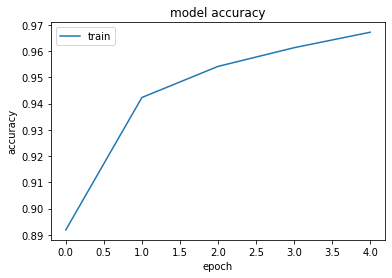

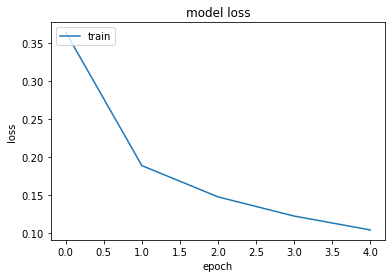

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

We reached **96%** training accuracy after 5 epochs! This doesn’t tell us much, though - we may be overfitting. The real challenge will be seeing how our model performs on our test data.
### 6. Testing the Model

In [9]:
# Evaluate the model.
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test)
)

313/313 [==============================] - 0s 571us/step - loss: 0.1056 - accuracy: 0.9665


[0.10560064762830734, 0.9664999842643738]

`evaluate()` returns the loss value & metrics values we specified for the model in test mode. Thus, our model achieves a 0.126 test loss and ~96% test accuracy.  

### 7. Use the model
We can save the trained model to disk so we can load it back up anytime

In [11]:
# Save the model to disk.
model.save_weights('./model.h.5')

We can reload the trained model whenever we want by rebuilding it and loading in the saved weights

In [12]:
# Build the model.
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

# Load the model's saved weights.
model.load_weights('./model.h5')

OSError: Unable to open file (unable to open file: name = './model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### 8. Prediction
Using the trained model to make predictions is easy: we pass an array of inputs to `predict()` and it returns an array of outputs. Keep in mind that the output of our network is 10 probabilities (because of softmax), so we’ll use `np.argmax()` to turn those into actual digits.

In [12]:
# Predict on the first 5 test images.
predictions = model.predict(X_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(y_test[:5])

[7 2 1 0 4]
[7 2 1 0 4]


### 8. Extensions
What we’ve covered so far was but a brief introduction - there’s much more we can do to experiment with and improve this network. I’ve included a few examples below:

#### Tuning Hyperparameters
In machine learning, a hyperparameter is a parameter whose value is set before the learning process begins. By contrast, the values of other parameters are derived via training. (wiki)

A good hyperparameter to start with is the learning rate for the Adam optimizer. What happens when you increase or decrease it?

In [13]:
model.compile(
  optimizer=keras.optimizers.Adam(learning_rate=0.0005),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [14]:
# Train the model.
model.fit(
  X_train,
  keras.utils.to_categorical(y_train),
  epochs=5,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  X_test,
  keras.utils.to_categorical(y_test)
)

Epoch 1/5
1875/1875 [==============================] - 2s 731us/step - loss: 0.0824 - accuracy: 0.9752
Epoch 2/5
1875/1875 [==============================] - 1s 726us/step - loss: 0.0704 - accuracy: 0.9785
Epoch 3/5
1875/1875 [==============================] - 1s 711us/step - loss: 0.0629 - accuracy: 0.9803
Epoch 4/5
1875/1875 [==============================] - 1s 794us/step - loss: 0.0585 - accuracy: 0.9813
Epoch 5/5
313/313 [==============================] - 0s 492us/step - loss: 0.0979 - accuracy: 0.9700


[0.09788013994693756, 0.9700000286102295]

#### Activations
What if we use an activation other than ReLU, e.g. sigmoid?

In [15]:
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='sigmoid', input_shape=(784,)),
  keras.layers.Dense(64, activation='sigmoid'),
  keras.layers.Dense(10, activation='softmax'),
])

#### Validation
We can also use the testing dataset for `validation` during training. Keras will evaluate the model on the validation set at the end of each epoch and report the loss and any metrics we asked for. This allows us to monitor our model’s progress over time during training, which can be useful to identify overfitting and even support early stopping.

In [16]:
# Build the model.
model = keras.models.Sequential([
  keras.layers.Dense(64, activation='relu', input_shape=(784,)),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

In [17]:
history = model.fit(
  X_train,
  keras.utils.to_categorical(y_train),
  epochs=5,
  batch_size=32,
  validation_data=(X_test, keras.utils.to_categorical(y_test))
)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5733 - accuracy: 0.8303 - val_loss: 0.2089 - val_accuracy: 0.9367
Epoch 2/5
1875/1875 [==============================] - 2s 861us/step - loss: 0.2017 - accuracy: 0.9386 - val_loss: 0.1588 - val_accuracy: 0.9481
Epoch 3/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.1538 - accuracy: 0.9526 - val_loss: 0.1447 - val_accuracy: 0.9553
Epoch 4/5
1875/1875 [==============================] - 2s 879us/step - loss: 0.1238 - accuracy: 0.9607 - val_loss: 0.1265 - val_accuracy: 0.9614
Epoch 5/5
1875/1875 [==============================] - 2s 843us/step - loss: 0.1026 - accuracy: 0.9675 - val_loss: 0.1219 - val_accuracy: 0.9627


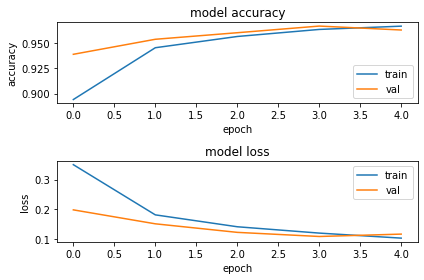

In [20]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()